# <center> Stock Market Tool </center>
## <center> Gain insights into your favorite stock </center>

In [7]:
# import library
from yahoo_fin.stock_info import *
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

## Price evolution, volatility and financial information:

Define a function to plot any stock and get general information about the company:

In [8]:
#set variable today
today = time.strftime("%m/%d/%Y")

#function to plot stock, and get general info about the company

def stockinfo(stock,start_date,end_date):
    
    #get stock price data and store a dictionary inside a dataframe, with the adjclose price column and date as index
    stock_price = get_data(stock, start_date= start_date, end_date= end_date)
    stock_df = pd.DataFrame({stock: stock_price["adjclose"]})
    
    #Plot to appear in jupiter notebook with a proper size
    %matplotlib inline
    %pylab inline
    pylab.rcParams['figure.figsize'] = (10.5, 6.3)
    
    #plot the graph
    plt.plot(stock_df)
    plt.title("Stock Price of " + stock.upper() + ' between ' + start_date + ' and ' + end_date)
    plt.xlabel('Date')
    plt.ylabel('Price in USD')
    plt.grid()
    plt.show()
    
    #plot an histogram with the 1-day percent change
    stock_price['adjclose'].pct_change().plot.hist(bins=50)
    plt.xlabel('adjusted close 1-day percent change')
    plt.axvline(x=0, linewidth=2, color='b')
    plt.show()
    
    
    #print information about analysts estimations and general information about the company
    print('Revenue Estimate from Analysts:')
    print(get_analysts_info(stock)['Revenue Estimate'].set_index('Revenue Estimate'))
    print()
    print('Financial Information (last Fiscal Year):')
    print(get_stats(stock).iloc[[9,11,12,13,14,15,16,17,18,19,21,22,54,55],:].set_index('Attribute'))

Select the stock, Start and End Date:

C:\ProgramData\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:73: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = result.sort_values("date")


Populating the interactive namespace from numpy and matplotlib


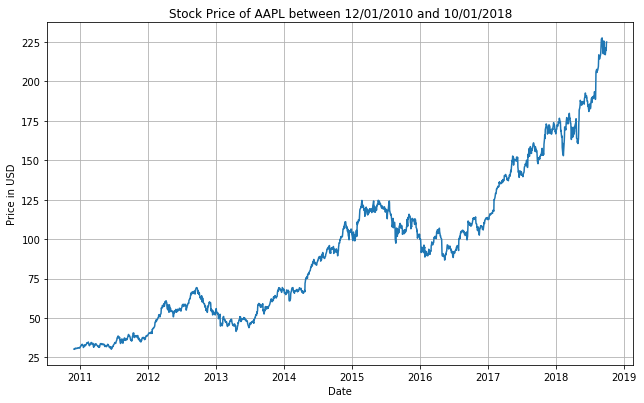

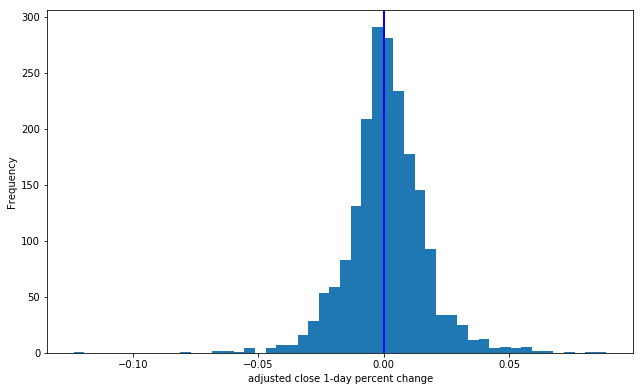

Revenue Estimate from Analysts:
                        Current Qtr. (Dec 2018) Next Qtr. (Mar 2019)  \
Revenue Estimate                                                       
No. of Analysts                              31                   31   
Avg. Estimate                            91.83B               64.66B   
Low Estimate                             88.96B               59.99B   
High Estimate                           100.93B                67.3B   
Year Ago Sales                           88.29B               61.14B   
Sales Growth (year/est)                   4.00%                5.80%   

                        Current Year (2019) Next Year (2020)  
Revenue Estimate                                              
No. of Analysts                          38               32  
Avg. Estimate                       279.12B          290.75B  
Low Estimate                           269B             270B  
High Estimate                       292.33B          326.36B  
Year Ago Sale

In [10]:
stockinfo('aapl','12/01/2010','10/01/2018')

## Return over a period:

Define a function to plot the stock return over a period:

In [20]:
#function to plot stock return over a selected period

def stockreturn(stock,start_date,end_date):
    
    #get stock price data and store a dictionary inside a dataframe, with the adjclose price column and date as index
    stock_price = get_data(stock, start_date= start_date, end_date= end_date)
    stock_df = pd.DataFrame({stock: stock_price["adjclose"]})
    
    #Define an anonymous function (lamda) to calculate the difference between every value in the period and the first value
    stock_return = stock_df.apply(lambda x: x / x[0])
    
    #Calculate the return over the period
    return_percentage = (stock_price["adjclose"][-1:].iloc[0] / stock_price["adjclose"][:1].iloc[0]) - 1
    
    #Plot the graph
    plt.plot(stock_return)
    plt.axhline(y=1,linewidth=2, color='b')
    plt.title("Stock Return of " + stock.upper() + ' between ' + start_date + ' and ' + end_date)
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.grid()
    plt.show()
    
    #Print the return value over the period
    print('The stock return ' + 'between ' + start_date + ' and ' + end_date  + ' is ' +"{:.2%}".format(return_percentage))

Select the stock, Start and End Date:

C:\ProgramData\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:73: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = result.sort_values("date")


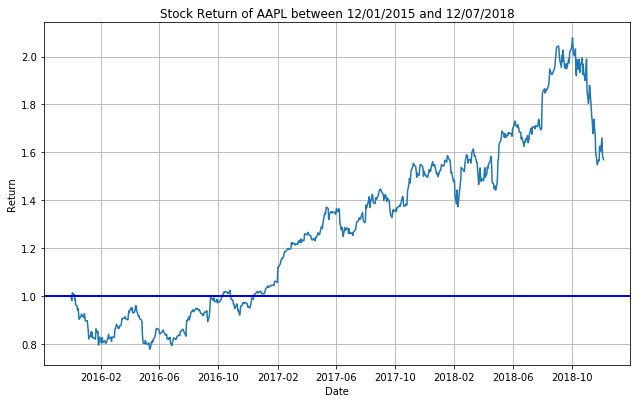

The stock return between 12/01/2015 and 12/07/2018 is 56.98%


In [21]:
stockreturn('aapl',start_date = '12/01/2015',end_date = today)

## Moving Averages and Benchmark Comparison:

Define a function to plot any stock with the 50 days and 200 days moving averages and compare it with a benchmark.
Also get a Short-Term buy or sell recommendation based on the position of the stock price and it's 50 days moving average.
Finally, get the Mid-Term trend by comparing the position of the moving averages:

In [16]:
#function to plot stock, moving averages and benchmark

def stockprice(stock,benchmark,start_date,end_date):
    
    #get stock price and benchmark price
    stock_price = get_data(stock, start_date= start_date, end_date= end_date)
    benchmark_price = get_data(benchmark, start_date= start_date, end_date= end_date)
    
    #calculate 50d and 200d moving averages and store them in a new column in stock price dataframe
    stock_price["50d"] = np.round(stock_price["adjclose"].rolling(window = 50, center = False).mean(), 2)
    stock_price["200d"] = np.round(stock_price["adjclose"].rolling(window = 200, center = False).mean(), 2)
    
    #store a dictionary inside a dataframe, with stock, 50d, 200d and benchmarks as keys
    stock_df = pd.DataFrame({stock: stock_price["adjclose"],
                      "50d": stock_price["50d"],
                      "200d": stock_price["200d"], benchmark: benchmark_price["adjclose"]})
    
    #plot a graph with all this variables together (benchark in secondary axis)
    stock_df.plot(secondary_y = benchmark, grid = True)
    plt.title('Stock Price of ' + stock.upper() +', Moving Averages and ' + benchmark.upper() +' Benchmark' + ' between '
              + start_date + ' and ' + end_date)
    plt.xlabel('Date')
    plt.ylabel('Price in USD')
    plt.show()
    
    print("Recommendation and trend based on moving averages and stock price position:")
    print()
    
    #create an if else statement for short-term recommendation based on the position of 50d moving average and the stock
    if stock_price["adjclose"][-1:].iloc[0] < stock_price["50d"][-1:].iloc[0]:
        print("Short-Term recommendation: " + "Sell")
    elif stock_price["adjclose"][-1:].iloc[0] > stock_price["50d"][-1:].iloc[0]:
        print("Short-Term recommendation: " + "Buy")
        
    #create an if else statement to show the mid-term trend based on the position of moving averages
    if stock_price["200d"][-1:].iloc[0] < stock_price["50d"][-1:].iloc[0]:
        print("Mid-Term Trend: " + "Uptrend")
    elif stock_price["200d"][-1:].iloc[0] > stock_price["50d"][-1:].iloc[0]:
        print("Mid-Term Trend: " + "Downtrend")

Select the stock, benchmark, Start and End Date:

C:\ProgramData\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:73: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = result.sort_values("date")


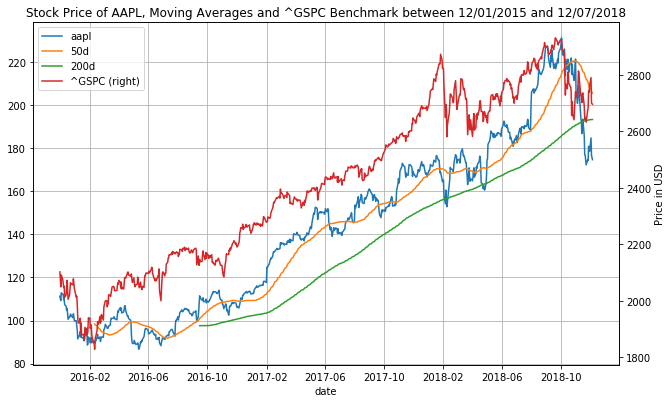

Recommendation and trend based on moving averages and stock price position:

Short-Term recommendation: Sell
Mid-Term Trend: Uptrend


In [17]:
stockprice('aapl','^GSPC','12/01/2015',today)

## References:

* https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
* http://theautomatic.net/yahoo_fin-documentation/
* https://www.datacamp.com/courses/machine-learning-for-finance-in-python